# csgo-clips-autotrim

> Experiments with using DL to automatically trim CSGO clips

## Install

`pip install your_project_name`

## How to use

In [1]:
import os
import pickle
# set the transformers cache location to a writable path
os.environ['TRANSFORMERS_CACHE'] = '/tmp/transformers_cache'

In [2]:
from transformers import LayoutLMv2Processor, TrOCRProcessor, VisionEncoderDecoderModel

from experiment_utils.constants import *
from experiment_utils.utils import getLogger

from csgo_clips_autotrim.feature_extraction import get_downsampled_frames, DownsampleConfig

In [3]:
def get_sample_videos_paths():
    clips_dir = os.path.join(DATA_DIR, 'clips')
    return [os.path.join(clips_dir, name) for name in os.listdir(clips_dir)]

In [4]:
all_vids = get_sample_videos_paths()

In [75]:
clip_name = 'overpass_ace_1080p.mp4.pickle'

In [76]:
downsampled_frames = []

In [77]:
if not os.path.exists(os.path.join(DATA_DIR, clip_name)):
    downsampled_frames = get_downsampled_frames(all_vids[0], downsample_config=DownsampleConfig.from_str('downsample_1920x1080_60_RGB'))
    
    with open(os.path.join(DATA_DIR, clip_name), 'wb') as f:
        pickle.dump(downsampled_frames, f)
else:
    with open(os.path.join(DATA_DIR, clip_name), 'rb') as f:
        downsampled_frames = pickle.load(f)

[INFO] 2022-03-02 15:03:08,732 root        : Getting video size for '/code/data/clips/overpass_ace.mp4'
100%|████████████████████████████████████████████████████████████████████████████| 7220/7220 [01:09<00:00, 103.50it/s]


In [78]:
layoutLM_processor = LayoutLMv2Processor.from_pretrained("microsoft/layoutlmv2-base-uncased", revision="no_ocr")

In [ ]:
trOCR_processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed")

In [81]:
trOCR_model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-printed").cuda()

In [82]:
def extract_all_text(image):
    pixel_values = trOCR_processor(image, return_tensors="pt").pixel_values.cuda()
    generated_ids = trOCR_model.generate(pixel_values)
    
    return trOCR_processor.batch_decode(generated_ids, skip_special_tokens=True)

In [83]:
def run_for_frames(frames):
    return [(i, extract_all_text(frame)) for i, frame in enumerate(frames)]

In [84]:
%%time
run_for_frames(downsampled_frames)

CPU times: user 6min 18s, sys: 7.96 s, total: 6min 26s
Wall time: 2min 14s


[(0, ['.1']),
 (1, ['. AM']),
 (2, ['. AM']),
 (3, ['. AM']),
 (4, ['. AM']),
 (5, ['. AM']),
 (6, ['. AM']),
 (7, ['. AM']),
 (8, ['. AM']),
 (9, ['. AM']),
 (10, ['. AM']),
 (11, ['. AM']),
 (12, ['. AM']),
 (13, ['. AM']),
 (14, ['. AM']),
 (15, ['. AM']),
 (16, ['. AM']),
 (17, ['. AM']),
 (18, ['. AM']),
 (19, ['. AM']),
 (20, ['. AM']),
 (21, ['. AM']),
 (22, ['. AM']),
 (23, ['. AM']),
 (24, ['. AM']),
 (25, ['. AM']),
 (26, ['..']),
 (27, ['. AM']),
 (28, ['. AM']),
 (29, ['. AM']),
 (30, ['. AM']),
 (31, ['. AM']),
 (32, ['. AM']),
 (33, ['.00']),
 (34, ['.00']),
 (35, ['.00']),
 (36, ['..']),
 (37, ['..']),
 (38, ['..']),
 (39, ['..']),
 (40, ['..']),
 (41, ['.Y']),
 (42, ['.Y']),
 (43, ['AM ON ONCLUSIONS. ON ON ON ON ON']),
 (44, ['2']),
 (45, ['2 ON ON ON ON']),
 (46, ['2 ON ON ON ON ON']),
 (47, ['2 ON ON ON ON ON']),
 (48, ['2 ON ON ON ON ON']),
 (49, ['2 ON ON ON ON ON']),
 (50, ['2 ON ON ON ON ON']),
 (51, ['2 ON ON ON ON ON ON']),
 (52, ['2 ON ON ON ON ON ON']),
 (53, 

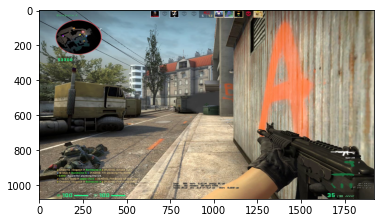

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(downsampled_frames[19], cmap='gray')

In [86]:
import torch

In [87]:
torch.cuda.is_available()

True